In [2]:
#Load the librarys
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn

#Importing the data
#df_credit = pd.read_csv("../input/german-credit-data-with-risk/german_credit_data.csv",index_col=0)
df_credit = pd.read_csv("C:\\Users\\Sonali\\Downloads\\Pandas Case Study\\german_credit_data.csv",index_col=0)
df_credit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


<a id="Known"></a> <br>
# **3. First Look at the data:** 
- Looking the Type of Data
- Null Numbers
- Unique values
- The first rows of our dataset

In [3]:
#Searching for Missings,type of data and also known the shape of data
print(df_credit.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 9 columns):
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
dtypes: int64(4), object(5)
memory usage: 78.1+ KB
None


In [12]:
#df_credit.isnull().sum()/len(df_credit)
df_credit['Job'].dtype

CategoricalDtype(categories=[0, 1, 2, 3], ordered=False)

In [9]:
#Looking unique values
print(df_credit.nunique())

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
dtype: int64


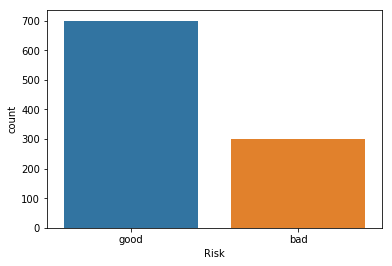

In [5]:
sns.countplot(df_credit['Risk'])

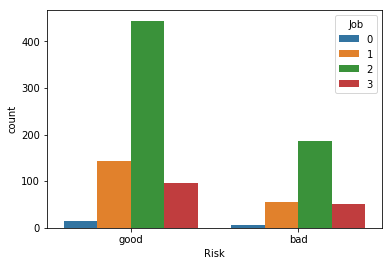

In [6]:
sns.countplot(x='Risk', hue='Job', data=df_credit)

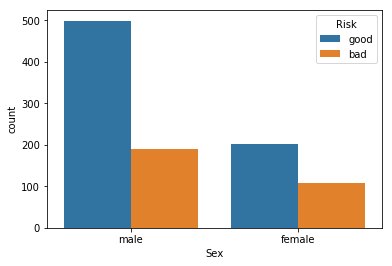

In [7]:
sns.countplot(x='Sex', hue='Risk', data=df_credit)

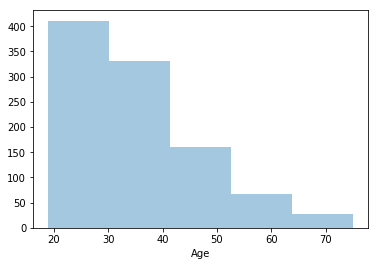

In [8]:
sns.distplot(df_credit['Age'],bins=5,kde=False)

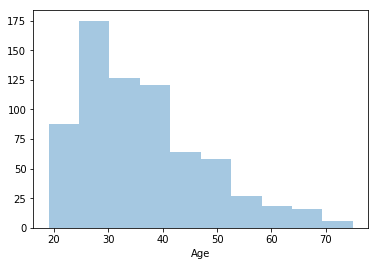

In [9]:
sns.distplot(df_credit[df_credit['Risk']=='good']['Age'], bins=10, kde=False)

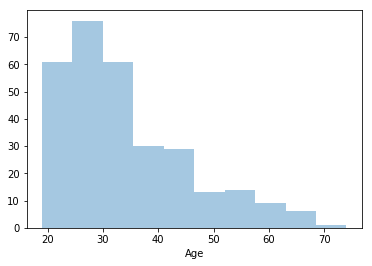

In [10]:
sns.distplot(df_credit[df_credit['Risk']=='bad']['Age'], bins=10, kde=False)

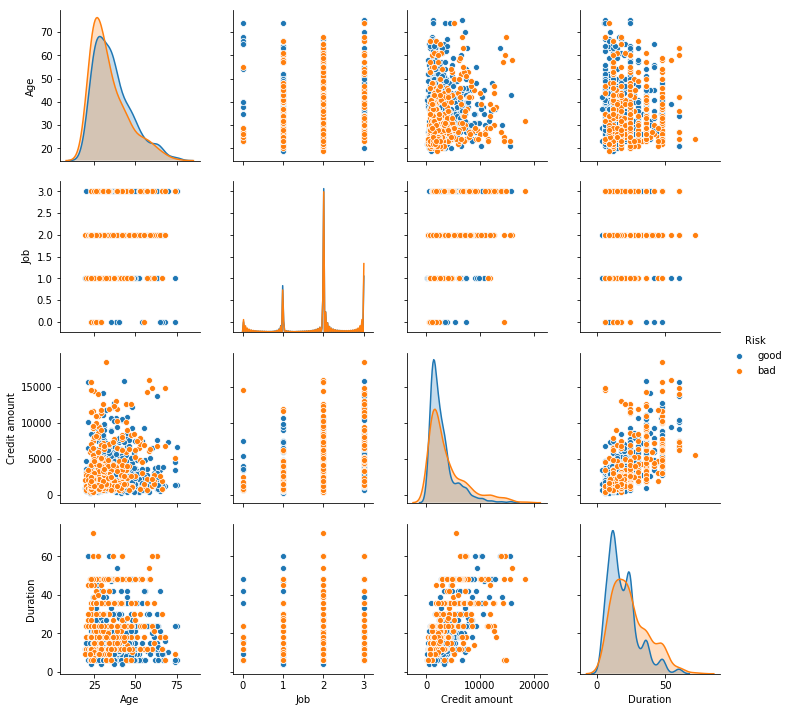

In [11]:
sns.pairplot(df_credit,hue='Risk')

In [10]:
df_credit.fillna('Missing', inplace=True)
df_credit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,Missing,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,Missing,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [11]:
df_credit['Job'] = df_credit['Job'].astype('category')

In [14]:
df_credit_dummy = pd.get_dummies(df_credit, drop_first = True)
df_credit_dummy.head()

,Age,Credit amount,Duration,Sex_male,Job_1,Job_2,Job_3,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_little,Checking account_moderate,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk_good
0,67,1169,6,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
1,22,5951,48,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,49,2096,12,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,45,7882,42,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1
4,53,4870,24,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0


In [15]:
X = df_credit_dummy.drop('Risk_good',axis=1)
y = df_credit_dummy['Risk_good']

In [16]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [18]:
log = LogisticRegression(solver = 'lbfgs', max_iter = 1000)
log.fit(X_train, y_train)
dt = DecisionTreeClassifier(max_depth = 50)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=50,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve
from sklearn.model_selection import GridSearchCV

In [20]:
y_pred_log = log.predict(X_test)
y_pred_dt = dt.predict(X_test)

In [21]:
print (accuracy_score(y_test,y_pred_log))
print (confusion_matrix(y_test, y_pred_log))
print (classification_report(y_test, y_pred_log))

0.736
[[ 25  47]
 [ 19 159]]
              precision    recall  f1-score   support

           0       0.57      0.35      0.43        72
           1       0.77      0.89      0.83       178

    accuracy                           0.74       250
   macro avg       0.67      0.62      0.63       250
weighted avg       0.71      0.74      0.71       250



In [22]:
print (accuracy_score(y_test,y_pred_dt))
print (confusion_matrix(y_test, y_pred_dt))
print (classification_report(y_test, y_pred_dt))

0.676
[[ 32  40]
 [ 41 137]]
              precision    recall  f1-score   support

           0       0.44      0.44      0.44        72
           1       0.77      0.77      0.77       178

    accuracy                           0.68       250
   macro avg       0.61      0.61      0.61       250
weighted avg       0.68      0.68      0.68       250



In [23]:
param_grid = { "max_depth" : [3,5,7,9,11,13,15,17,19,21],
              "max_features" : [2,4,6,8,10]}

model = RandomForestClassifier(random_state = 42)

grid_search = GridSearchCV(model, param_grid = param_grid, cv = 5 )

In [24]:
grid_search.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'

In [25]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.7346666666666667
{'max_depth': 7, 'max_features': 2}


In [26]:
rf = RandomForestClassifier(max_depth= 7, max_features= 2)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print (accuracy_score(y_test,y_pred_rf))
print (confusion_matrix(y_test, y_pred_rf))
print (classification_report(y_test, y_pred_rf))

0.744
[[ 15  57]
 [  7 171]]
              precision    recall  f1-score   support

           0       0.68      0.21      0.32        72
           1       0.75      0.96      0.84       178

    accuracy                           0.74       250
   macro avg       0.72      0.58      0.58       250
weighted avg       0.73      0.74      0.69       250



/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [27]:
y_pred_prob = rf.predict_proba(X_test)[:,1]

In [28]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

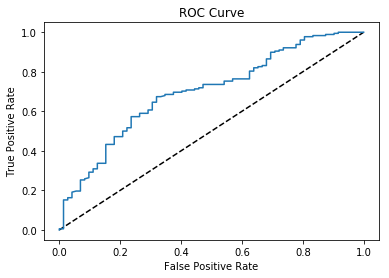

In [29]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()